In [2]:
#all the librarys used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("startup_data.csv.xls")
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [6]:
df.size

45227

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Data Type Identification

In [8]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

Categorical data

In [9]:
df_category = df.select_dtypes(include='object')
df_category

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,NaN,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,CA,advertising,c:21343,acquired
919,MA,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,MA,security,c:41747,closed
920,CA,94089,c:31549,Sunnyvale,NaN,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,CA,biotech,c:31549,closed
921,CA,94404,c:33198,San Francisco,NaN,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,CA,software,c:33198,acquired


Numerical Data

In [47]:
def find_numeric(df):
    numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric=df.select_dtypes(include=numeric)
    return df_numeric

Data Cleaning and Pre-processing: It involves finding Null/NaN values, replacing column names, changing data types, dropping unwanted columns and so on

In [15]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


seems like there are lot of negative values present, differences seen between mean and median indicate outlier or skewed distribution

In [17]:
# finding the columns with missing values and its percentage wrt complete dataframe

df_null =pd.DataFrame(df.isnull().sum(), columns =["Null Count"])
# percentage of missing values
df_null["%"] = (df.isnull().sum()/len(df)*100)
df_null = df_null[df_null["%"] > 0]
df_null["Null Count"].sum()
df_null

# there are 1386 missing values in total with 2 columns having > 50% of missing values. 
# This indicates either we can drop this column or imput the missing values
# for columns having less than 50% , it makes sense to imput the missing values.

,Null Count,%
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [18]:
# Unnamed doesnot have much value and closed_at null indicates the company is "acquired". Hence we can drop these 2 columns
df.drop(['Unnamed: 6', 'closed_at'], axis=1, inplace=True)
df.shape

(923, 47)

In [31]:
# for the companies with milestones 0, the age_first_milestone_year and age_last_milestone_year columns have NaN values.
#  So for this we can imput with mean values

df_milestones = df.query('milestones == 0')
df_milestones.loc[:, ['age_first_milestone_year', 'age_last_milestone_year', 'milestones']]

,age_first_milestone_year,age_last_milestone_year,milestones
12,NaN,NaN,0
15,NaN,NaN,0
24,NaN,NaN,0
32,NaN,NaN,0
34,NaN,NaN,0
...,...,...,...
885,NaN,NaN,0
903,NaN,NaN,0
904,NaN,NaN,0
906,NaN,NaN,0


In [32]:
mean_value1=df['age_first_milestone_year'].mean()
mean_value2=df['age_last_milestone_year'].mean()
df["age_first_milestone_year"].fillna(value=mean_value1,inplace=True)
df["age_last_milestone_year"].fillna(value=mean_value2,inplace=True)

In [36]:
df.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech

In [ ]:
# we see only 1 column has null value, and there is state_code column with same values. hence state_code.1 can be dropped as its a duplicate

df.loc[:, ['state_code.1', 'state_code']]
df.drop(['state_code.1'], axis=1, inplace=True)

In [39]:
df.shape

(923, 46)

We have eliminated all columns with missing values, next we can check columns having invalid data
Invalid data can be: negative values, unmatched datatype, columns with no strong correlation or with no defined meaning

In [42]:
#df.loc[:, ['labels', 'status']]
# these columns not have any valid correlation on the status, so can be dropped

df.loc[:, ['id', 'Unnamed: 0', 'object_id']]
df.drop(['id', 'Unnamed: 0', 'object_id'], axis=1, inplace=True)

In [43]:
df.shape

(923, 43)

In [49]:
# checking for rows with negative values and milestone related colums have negative values.

df_num = find_numeric(df)

for a in range(len(df_num.columns)):
  if df_num.columns[a]=="latitude" or df_num.columns[a]=="longitude":
    pass
  else:
    print("Is there any negative value in '{}' column : {} ".
          format(df_num.columns[a],(df[df_num.columns[a]]<0).any()))



Is there any negative value in 'labels' column : False 
Is there any negative value in 'age_first_funding_year' column : True 
Is there any negative value in 'age_last_funding_year' column : True 
Is there any negative value in 'age_first_milestone_year' column : True 
Is there any negative value in 'age_last_milestone_year' column : True 
Is there any negative value in 'relationships' column : False 
Is there any negative value in 'funding_rounds' column : False 
Is there any negative value in 'funding_total_usd' column : False 
Is there any negative value in 'milestones' column : False 
Is there any negative value in 'is_CA' column : False 
Is there any negative value in 'is_NY' column : False 
Is there any negative value in 'is_MA' column : False 
Is there any negative value in 'is_TX' column : False 
Is there any negative value in 'is_otherstate' column : False 
Is there any negative value in 'is_software' column : False 
Is there any negative value in 'is_web' column : False 
Is t

In [50]:
# we cannot imput mean for the negative values as it will include mean values as well. 
# so we can drop those rows considering them as invalid

df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [51]:
df.shape

(840, 43)

In [62]:
# checking datatypes for date related columns

df[['first_funding_at', 'founded_at', 'last_funding_at']].info()

# converting these columns to datetime type
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df.size

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 922
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_funding_at  840 non-null    datetime64[ns]
 1   founded_at        840 non-null    datetime64[ns]
 2   last_funding_at   840 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 58.5 KB


36120

Since there are lot of data, there could be potential outliers. Its a good practice to check it and drop those values if necessary

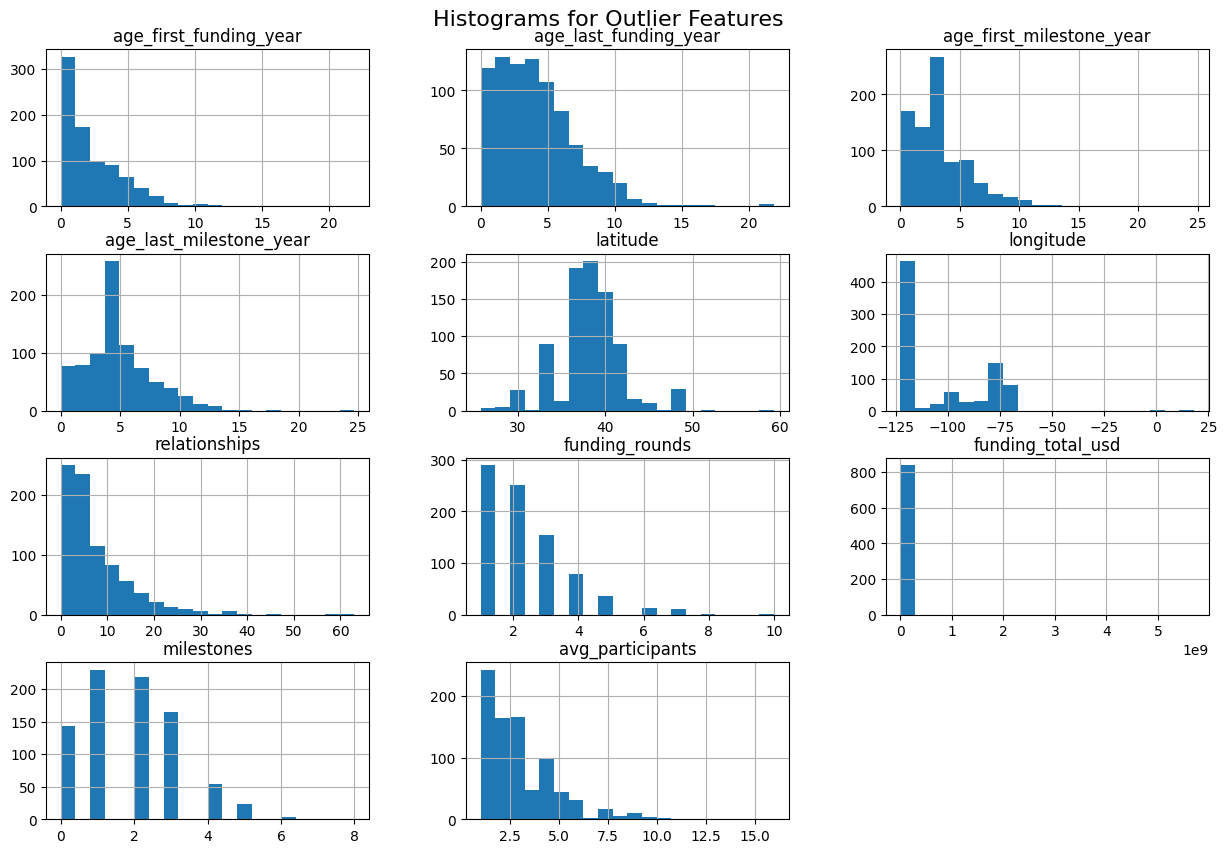

In [78]:
outlier = ["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year", "latitude", "longitude", 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

df[outlier].hist(bins=20, figsize=(15, 10), density=False)
plt.suptitle('Histograms for Outlier Features', x=0.5, y=0.92, fontsize=16)
plt.show()

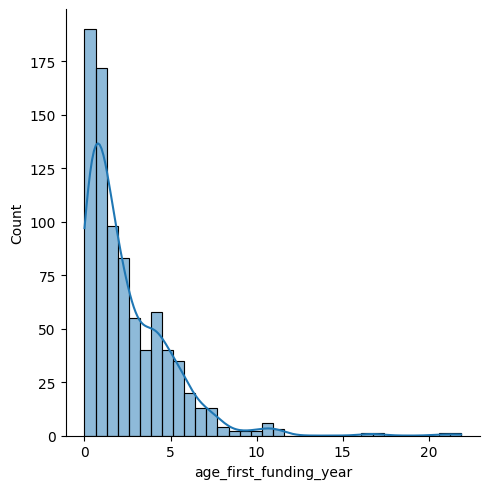

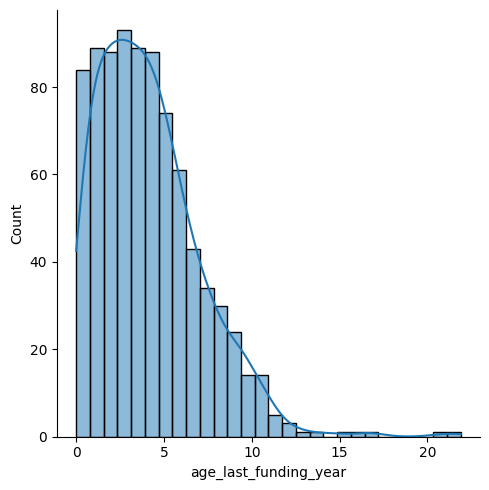

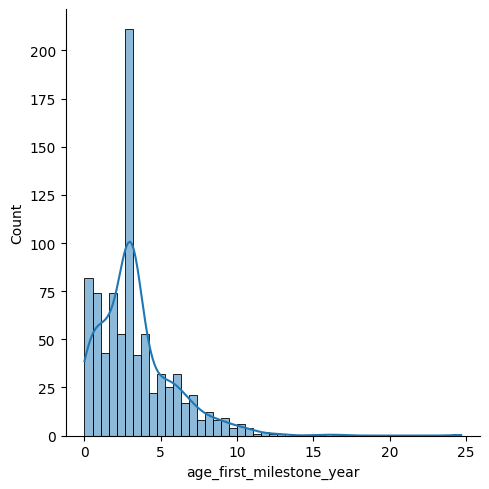

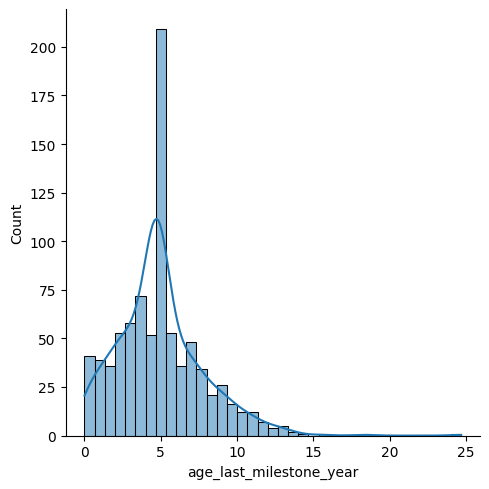

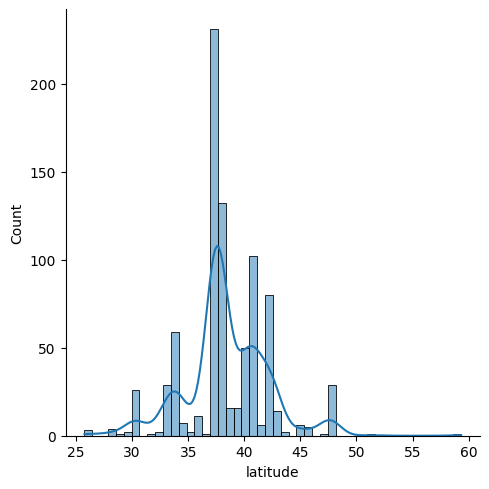

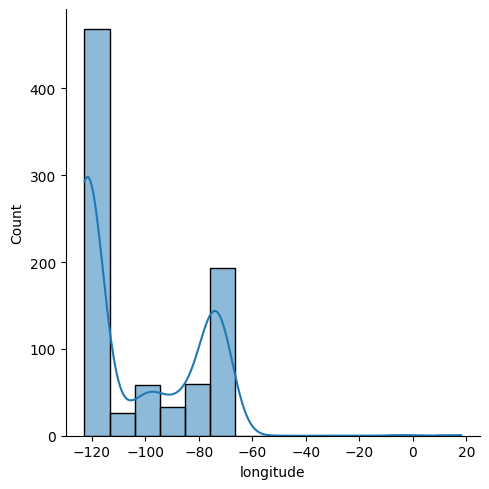

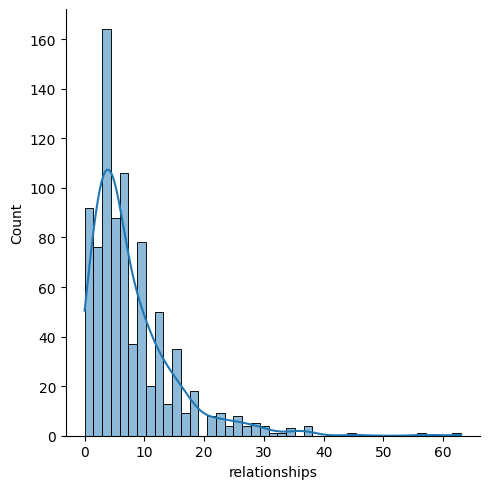

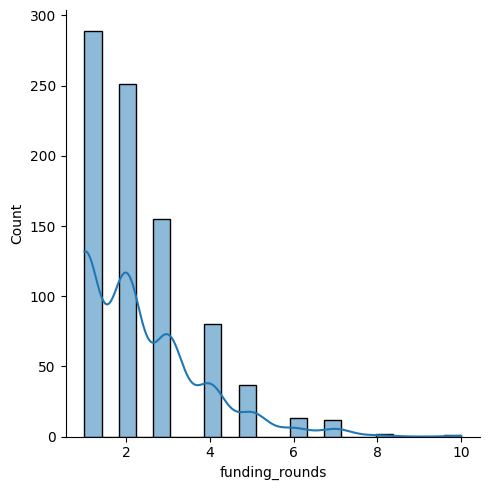

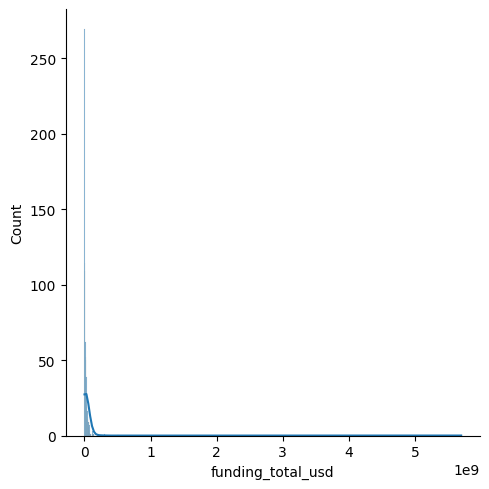

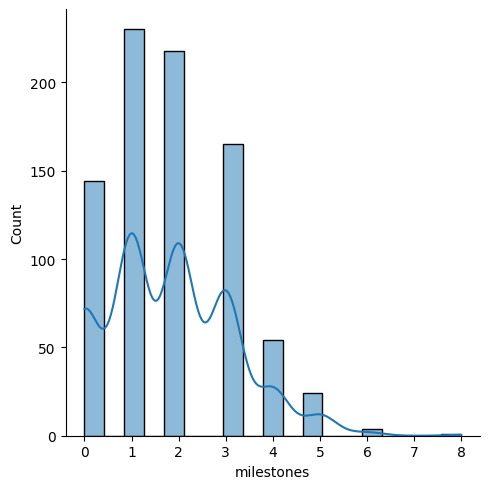

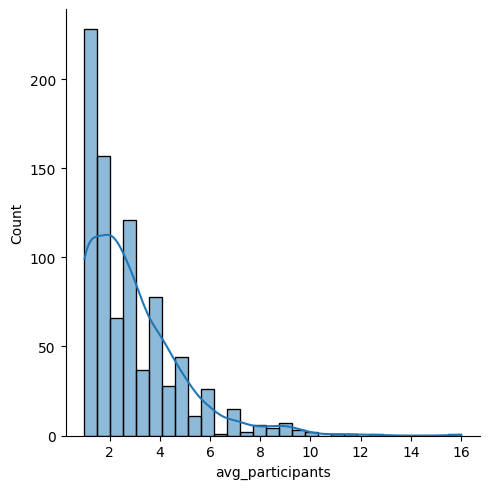

In [79]:
for i in outlier:
  sns.displot(df[i], kde=True)
  plt.show()

Number of outliers in age_first_funding_year: 4
Number of outliers in age_last_funding_year: 4
Number of outliers in age_first_milestone_year: 3
Number of outliers in age_last_milestone_year: 2
Number of outliers in latitude: 1
Number of outliers in longitude: 2
Number of outliers in relationships: 7
Number of outliers in funding_rounds: 3
Number of outliers in funding_total_usd: 1
Number of outliers in milestones: 1
Number of outliers in avg_participants: 4


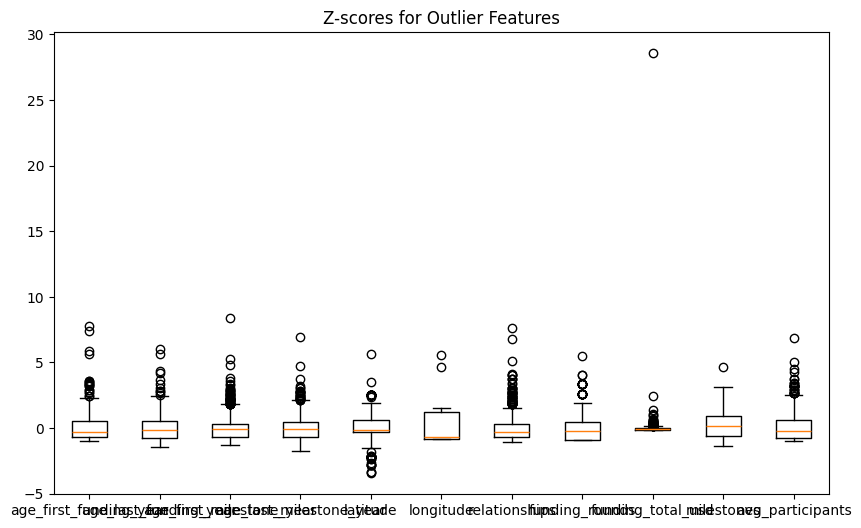

In [87]:
# to get the counts of total outliers for all columns, we can calculate Zscores
from scipy.stats import zscore

z_scores = zscore(df[outlier])
z_score_threshold = 4

outliers_count = (z_scores > z_score_threshold).sum(axis=0)

# Display the count of outliers for each feature
for feature, count in zip(outlier, outliers_count):
    print(f"Number of outliers in {feature}: {count}")

# visualizing Z scores
plt.figure(figsize=(10, 6))
plt.boxplot(z_scores, labels=outlier)
plt.title("Z-scores for Outlier Features")
plt.show()


In [88]:
for i in outlier:
  print(df[i].skew())

2.329300647780428
1.218519581073955
1.7936741337416173
1.0331135978833794
0.1986926853628681
0.774360121966471
2.322944056445443
1.364436574174415
27.835663110176245
0.5816307709668989
1.7582525792116943


In [ ]:
# not sure if this steps needs to be perfomed

def remove_outliers(df, columns_to_remove_outliers):
 for i in range(0, len(columns_to_remove_outliers)):
   q1 = df[columns_to_remove_outliers[i]].quantile(0.25)
   q3 = df[columns_to_remove_outliers[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[columns_to_remove_outliers[i]] >= lower_bound) & 
                     (df[columns_to_remove_outliers[i]] <= upper_bound)]
   return cleaned_data

columns_to_remove_outliers=['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

new_df=remove_outliers(df,columns_to_remove_outliers)
print(new_df.shape)